In [1]:
from sklearn import datasets as skds
from sklearn import model_selection as skms
import sklearn
import tensorflow.keras as keras
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

In [3]:
X, y = skds.make_regression(n_samples=200, 
                           n_features=1,
                           n_informative=1,
                           n_targets=1,
                           noise=20.0)

In [8]:
if (y.ndim==1):
    y = y.reshape(len(y), 1)

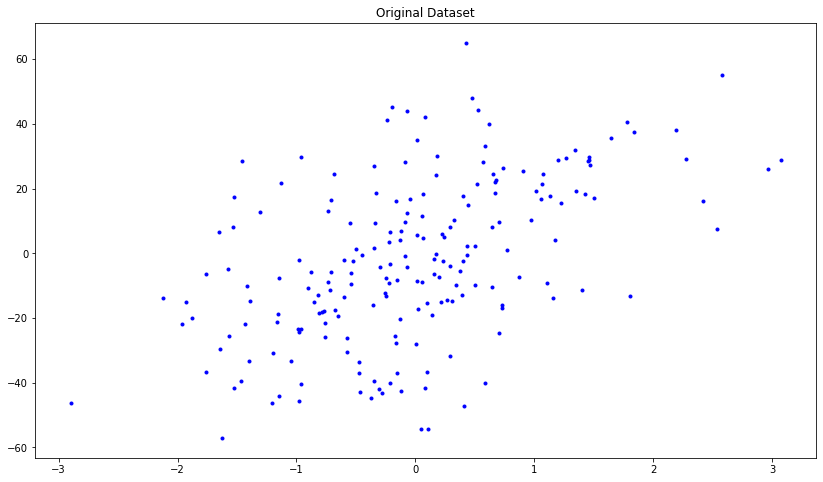

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 8))
plt.plot(X, y, 'b. ')
plt.title('Original Dataset')
plt.show()

In [12]:
x_train, x_test, y_train, y_test = skms.train_test_split(X, y, 
                                                        test_size=0.4,
                                                        random_state=123)

In [18]:
dim_outputs = y_train.shape[1]
dim_inputs = x_train.shape[1]

In [20]:
x_tensor = tf.placeholder(dtype=tf.float32, 
                          shape=[None, dim_inputs],
                         name='x')
y_tensor = tf.placeholder(dtype=tf.float32,
                         shape=[None, dim_outputs],
                         name='y')

w = tf.Variable(tf.zeros([dim_inputs, dim_outputs]),
               dtype=tf.float32,
               name='w')
b = tf.Variable(tf.zeros([dim_outputs]),
               dtype=tf.float32,
               name='b')

In [22]:
f = tf.matmul(x_tensor, w) + b

In [31]:
mse_loss = tf.reduce_mean(tf.square(f - y_tensor))

In [32]:
learning_rate = 0.001
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(mse_loss)

In [30]:
# Train
num_epochs = 1500
w_hat = 0
b_hat = 0
loss_epochs = np.empty(shape=[num_epochs], dtype=np.float)
mse_epochs = np.empty(shape=[num_epochs], dtype=np.float)
rs_epochs = np.empty(shape=[num_epochs], dtype=np.float)

mse_score = 0
rs_score = 0

In [34]:
with tf.Session() as tfs:
    tf.global_variables_initializer().run()
    for epoch in range(num_epochs):
        tfs.run(optimizer, feed_dict={x_tensor: x_train, y_tensor: y_train})
        
        loss_val = tfs.run(mse_loss, feed_dict={x_tensor: x_train, y_tensor: y_train})
        loss_epochs[epoch] = loss_val
        
        w_hat, b_hat = tfs.run([w, b])
        w_hat = w_hat.reshape(1)        

In [35]:
print('model : Y = {0:.8f} X + {1:.8f}'.format(w_hat[0],b_hat[0]))

model : Y = 11.62328339 X + -1.60265410


In [37]:
x_plot = [np.min(X), np.max(X)+1]
y_plot  = w_hat * x_plot + b_hat

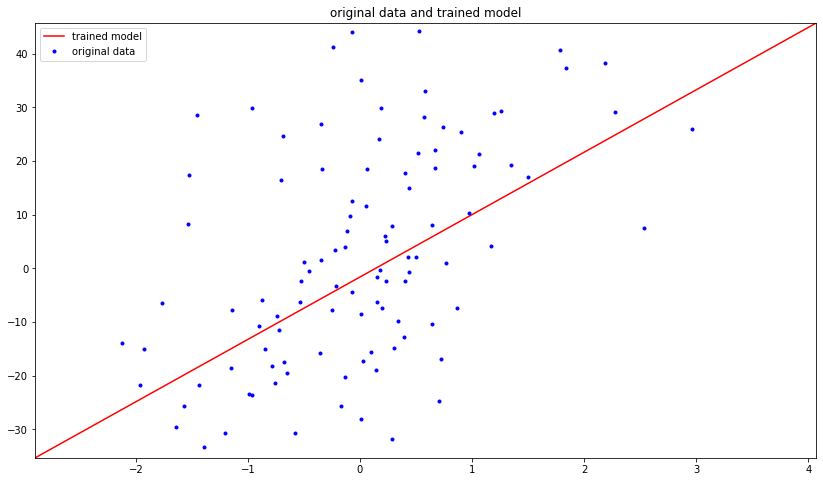

In [41]:
plt.figure(figsize=(14, 8))
plt.title('original data and trained model')
plt.axis([x_plot[0], x_plot[1], y_plot[0], y_plot[1]])
plt.plot(x_plot, y_plot, 'r', label='trained model')
plt.plot(x_train, y_train, 'b.', label='original data')
plt.legend()
plt.show()

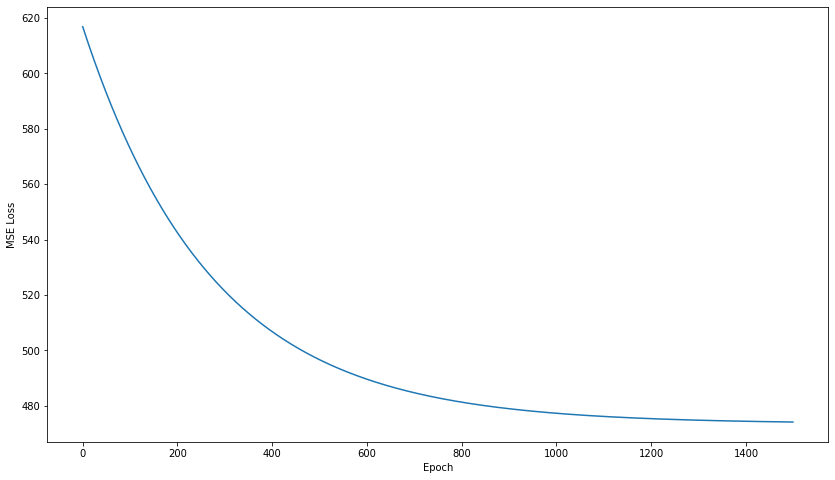

In [51]:
plt.figure(figsize=(14, 8))
plt.plot(range(len(loss_epochs)), loss_epochs)

plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.show()

# Logistic Regression

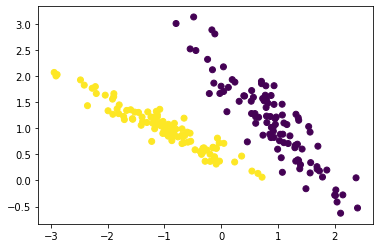

In [169]:
X, Y = skds.make_classification(n_samples=200, n_features=2,
                                n_informative=2, n_redundant=0,
                                n_repeated=0, n_classes=2,
                               n_clusters_per_class=1)
if Y.ndim == 1:
    Y = Y.reshape((-1, 1))
    
plt.scatter(X[:, 0], X[:, 1], marker='o', c=Y.ravel())
plt.show()

In [170]:
y_one_hot = tf.one_hot(Y.ravel(), 2)

In [171]:
X_train, X_test, y_train, y_test = skms.train_test_split(X, Y, test_size=0.4, 
                                                        random_state=int(time.time()))

In [195]:
n_input = X_train.shape[1]
n_output = y_train.shape[1]

x = tf.placeholder(tf.float32, shape=[None, n_input], name='y')
w = tf.Variable(tf.truncated_normal_initializer(mean=0, stddev=0.001)(shape=[n_input, n_output]),
                dtype=tf.float32, name='w')
b = tf.Variable(tf.truncated_normal_initializer(mean=0, stddev=0.001)(shape=[n_output]),
                dtype=tf.float32, name='b')

y = tf.placeholder(tf.float32, shape=[None, n_output], name='y')

In [196]:
z = tf.matmul(x, w) + b
P = tf.sigmoid(z)

In [304]:
loss = -tf.reduce_mean(
    y * tf.log(P) + (1-y) * tf.log(1-P))
optimizer = tf.train.GradientDescentOptimizer(
            learning_rate=0.05).minimize(loss)

In [284]:
epochs = 50

In [285]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [305]:
hist_acc = []
hist_loss = []
for epoch in range(epochs):
    _, loss_val = sess.run([optimizer, loss], feed_dict={x: X_train, y: y_train})
    P_pred = sess.run(P, feed_dict={x: X_test})
    y_pred = (P_pred > 0.5).astype(np.int)
    y_orig = sess.run(y, feed_dict={y: y_test})
    y_orig = y_orig.astype(np.int)
    matches = sess.run(tf.equal(y_pred, y_orig))
    acc_op = tf.reduce_mean(tf.cast(matches, tf.float32))
    #if acc - prev_acc < 0.00001:
     #   break
    prev_acc = acc
    hist_acc.append(acc)
    hist_loss.append(loss_val)
    acc = sess.run(acc_op)
    res_w = sess.run(w)
    res_b = sess.run(b)
    
    if epoch % 5 == 0:
        print("epoch {0:04d} test acc={1:.8f}, loss={2:.8f}".format(
            epoch, acc, loss_val))
        print('w =', res_w, '\nb =', res_b)

epoch 0000 test acc=1.00000000, loss=0.01082386
w = [[-6.393132 ]
 [-5.0954847]] 
b = [5.6361036]
epoch 0005 test acc=1.00000000, loss=0.01079376
w = [[-6.3943067]
 [-5.0973325]] 
b = [5.6344547]
epoch 0010 test acc=1.00000000, loss=0.01076396
w = [[-6.3954782]
 [-5.0991707]] 
b = [5.632815]
epoch 0015 test acc=1.00000000, loss=0.01073442
w = [[-6.396647 ]
 [-5.1009994]] 
b = [5.6311836]
epoch 0020 test acc=1.00000000, loss=0.01070519
w = [[-6.3978124]
 [-5.1028185]] 
b = [5.6295614]
epoch 0025 test acc=1.00000000, loss=0.01067623
w = [[-6.398975]
 [-5.104628]] 
b = [5.627948]
epoch 0030 test acc=1.00000000, loss=0.01064755
w = [[-6.4001346]
 [-5.1064286]] 
b = [5.626343]
epoch 0035 test acc=1.00000000, loss=0.01061913
w = [[-6.4012914]
 [-5.1082196]] 
b = [5.6247463]
epoch 0040 test acc=1.00000000, loss=0.01059097
w = [[-6.4024453]
 [-5.1100016]] 
b = [5.6231585]
epoch 0045 test acc=1.00000000, loss=0.01056307
w = [[-6.4035964]
 [-5.1117744]] 
b = [5.6215787]


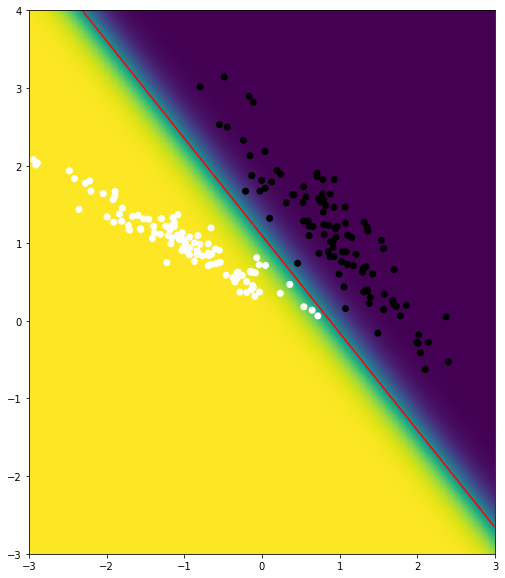

In [310]:
xx = np.linspace(-3, 3, 1000)
yy = np.linspace(-3, 4, 1000)
xx, yy = np.meshgrid(xx, yy)
full_plane = np.c_[xx.ravel(), yy.ravel()]

proba_plane = sess.run(P, feed_dict={x: full_plane})
proba_plane = proba_plane.reshape((1000, 1000))

plt.figure(figsize=(10, 10))
plt.imshow(proba_plane, extent=(-3, 3, -3, 4), origin='lower', cmap='viridis')
plt.scatter(X[:, 0], X[:, 1], marker='o', 
            c=Y.ravel(), cmap='gray')

probas = proba_plane.ravel()
surface_points = full_plane[np.abs(probas - 0.5) < 0.001]
plt.plot(surface_points[:, 0], surface_points[:, 1], 'r')

plt.show()


In [313]:
res_w, res_b

(array([[-6.4045153],
        [-5.113186 ]], dtype=float32),
 array([5.6203213], dtype=float32))

In [314]:
sess.close()